# Tutorial 2 Questions

Now its your turn to do a bit more exploring the same data set. 

You do need to run the following line of code to load the data to this notebook.

In [4]:
source("http://www.openintro.org/stat/data/cdc.R")

1) Make a scatterplot of weight versus desired weight. Describe the relationship between these two variables.

** There appears to be a positive relationship between weight and desired weight.  There are also some unusual values, on the right hand side there are two outliers with weights around 500 pounds.  At the top of the plot there are two unusual scores with desired weights around 600-700 pounds.  It seems likely that those are errors of some form.**

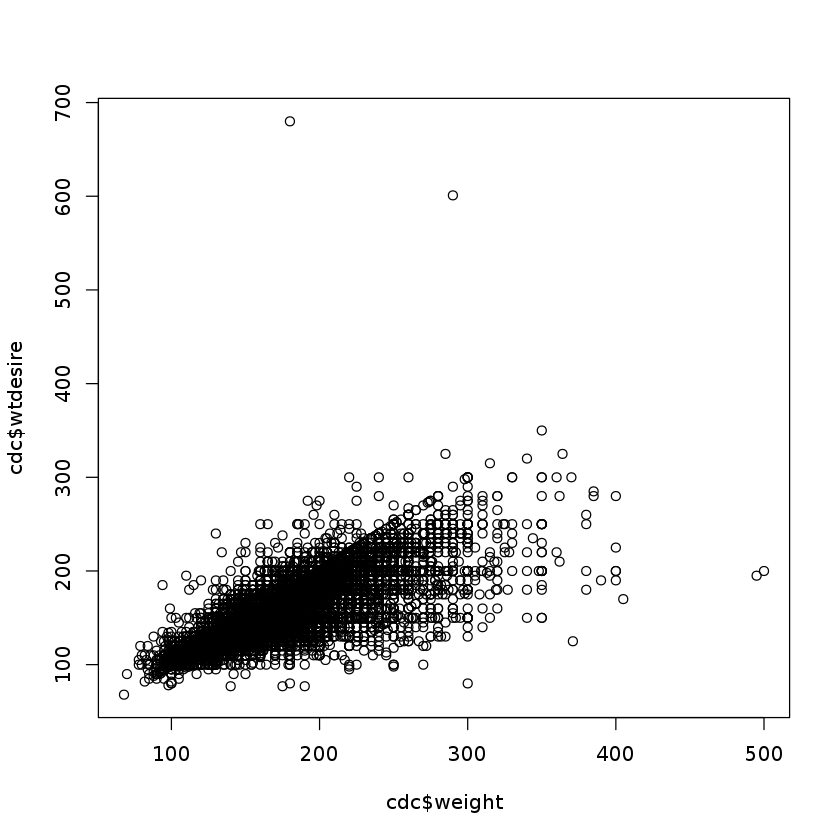

In [5]:
plot(x=cdc$weight,y=cdc$wtdesire)

2) Let’s consider a new variable: the difference between desired weight (wtdesire) and current weight (weight). Create this new variable by subtracting the two columns in the data frame and assigning them to a new object called wdiff.

**After computing this new object I have printed its first 6 entires.  I can compare that to the original data table to confirm that I have computed what I intended to compute.**

In [6]:
wdiff<-cdc$weight-cdc$wtdesire

In [7]:
head(wdiff)

[1]  0 10  0  8 20  0

In [8]:
head(cdc)

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
1,good,0,1,0,70,175,175,77,m
2,good,0,1,1,64,125,115,33,f
3,good,1,1,1,60,105,105,49,f
4,good,1,1,0,66,132,124,42,f
5,very good,0,1,0,61,150,130,55,f
6,very good,1,1,0,64,114,114,55,f


3) What type of data is wdiff? If an observation wdiff is 0, what does this mean about the person’s weight and desired weight. What if wdiff is positive or negative?

** wdiff is a continuous numerical variable.  
If a persons wdiff is 0 that means they are currently at their desired weight.  If a persons wdiff is positive it means their current weight is higer than their desired weight,they likely want to lose weight.  The opposite is true if wdiff is negative.**

**If you made different choices in calculating wdiff, you may have the opposite here.**

4) Describe the distribution of wdiff in terms of its center, shape, and spread, including any plots you use. What does this tell us about how people feel about their current weight?

In [9]:
summary(wdiff)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-500.00    0.00   10.00   14.59   21.00  300.00 

** The summary command gives a good view of the center and spread.  The mean is 14.59, and the median is 10.  While the range is 300-(-500)=800 and the IQR=21.00-0.00=21.  Using just the range would make it seem like the data is very spread out, which not a good description of this data.  Most of it is very close to the median.  The IQR better represents the spread.  50% of the data falls within a 21 pound range. We could aslo compute the standard deviation as another measure of spread.  It is quite large, once again due to those extremely large outliers.**

In [10]:
sd(wdiff)

[1] 24.04586

** The standard deviation of 24 means that we would expect approximately 70% of the data to be between -10 and 38 (within 1 SD of the mean).  If you look at the histogram below you can see that  more than 70% is in this range.  That is due to the outliers which inflated the standard deviation.**

---

I have compute how many data points are in the given range below.

In [11]:
length(subset(wdiff,wdiff<38.635,wdiff>-9.455))

[1] 17531

So 17531/20000=88% of the data lies withing 1 standard deviation of the mean.

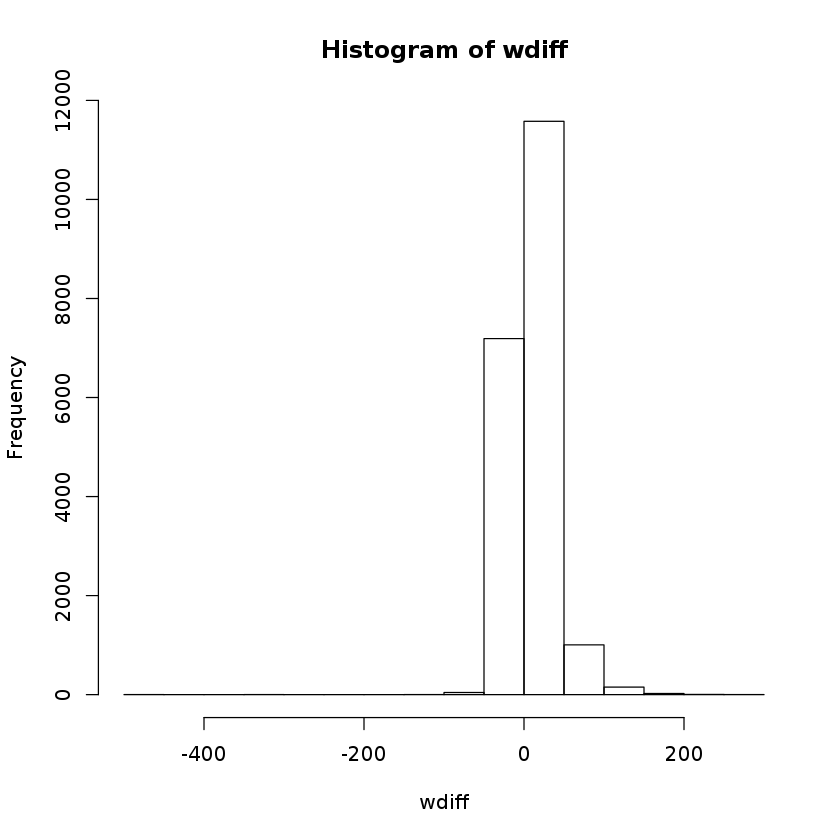

In [12]:
hist(wdiff)

I don't like the default histogram for this data.  Almost all of the data is in 3 of the bins.  I am going to ask R to make a new histogram this time telling R to break the data into more intervals by setting `breaks=50`.  I played around with a couple of options for the number of breaks and chose the one I liked the best.

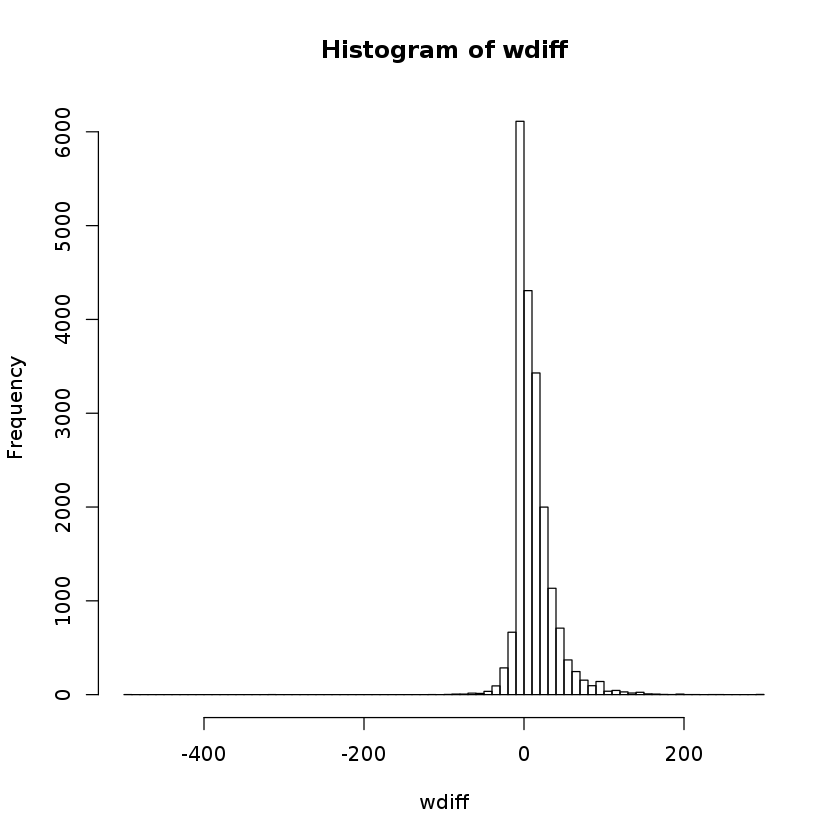

In [10]:
hist(wdiff,breaks=100)

**With the second histogram is is easiter to see the shape of the data, you can experiment with other options for the number of breaks. ** 

**The data is unimodal, and skewed to the right.  **

I will also produce a box plot below.

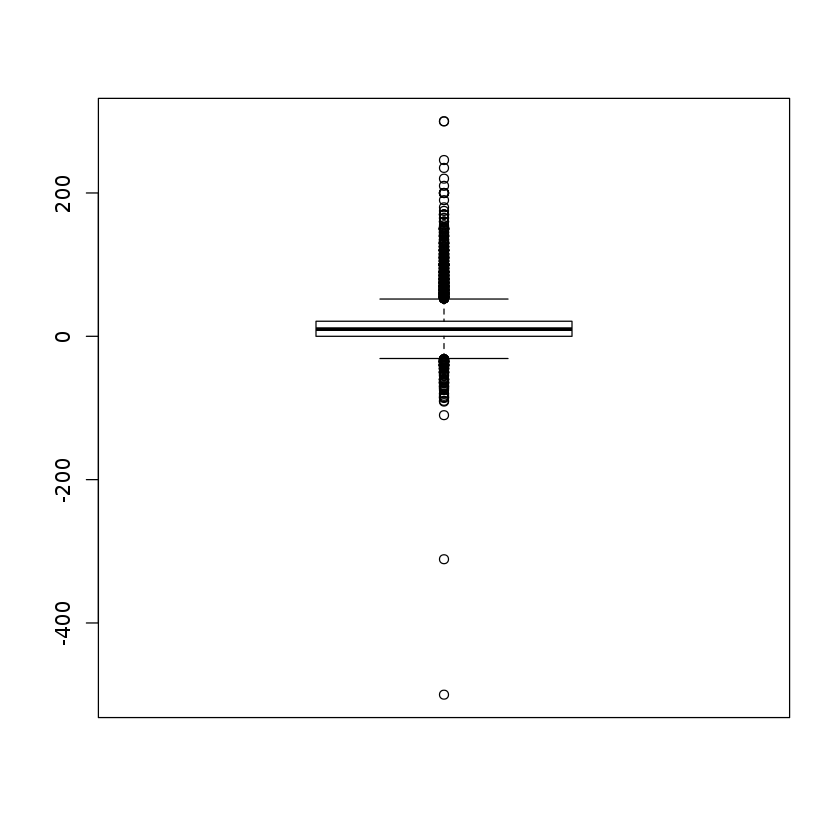

In [11]:
boxplot(wdiff)

**You can clearly see the outliers at the bottom, near -400, and -300.  We could make a more readable boxplot by manipulating the axis, or by temporaraly ommiting the two suspect values.  You can imagine where you would need to add the two outlier to the plot below.  Probably somewhere far to the left of your monitor.**

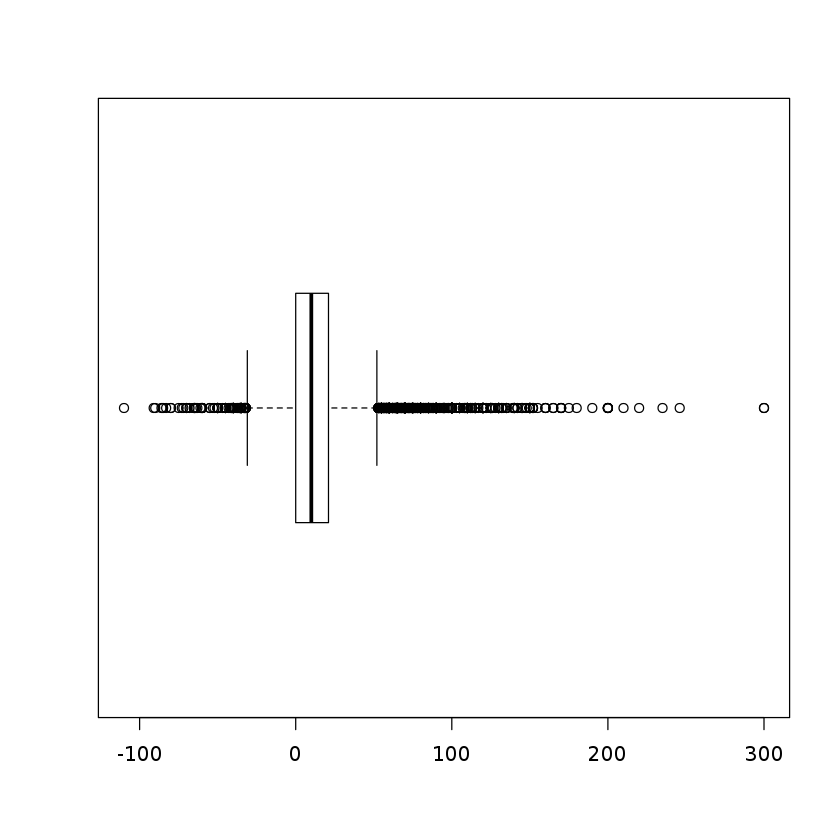

In [12]:
boxplot(subset(wdiff,wdiff>-200),horizontal=TRUE)

5) Using numerical summaries and a side-by-side box plot, determine if men tend to view their weight differently than women.

** I am going to start by sperating the data in to two groups, wdiff_m with the male data, and wdiff_f with the female data.**

In [13]:
wdiff_m<-subset(wdiff,cdc$gender=='m')
head(wdiff_m)

[1]  0  9 10 10 11 20

In [14]:
wdiff_f<-subset(wdiff,cdc$gender=="f")
head(wdiff_f)

[1] 10  0  8 20  0 20

In [15]:
summary(wdiff_m)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-500.00    0.00    5.00   10.71   20.00  300.00 

In [16]:
summary(wdiff_f)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -83.00    0.00   10.00   18.15   27.00  300.00 

We can see from the summaries that the both the mean and median values are lower for men that for women.  We will make some plots to also compare the data distributions.  Later when we do hypothesis tests we can check to see if this difference is statistically significant.

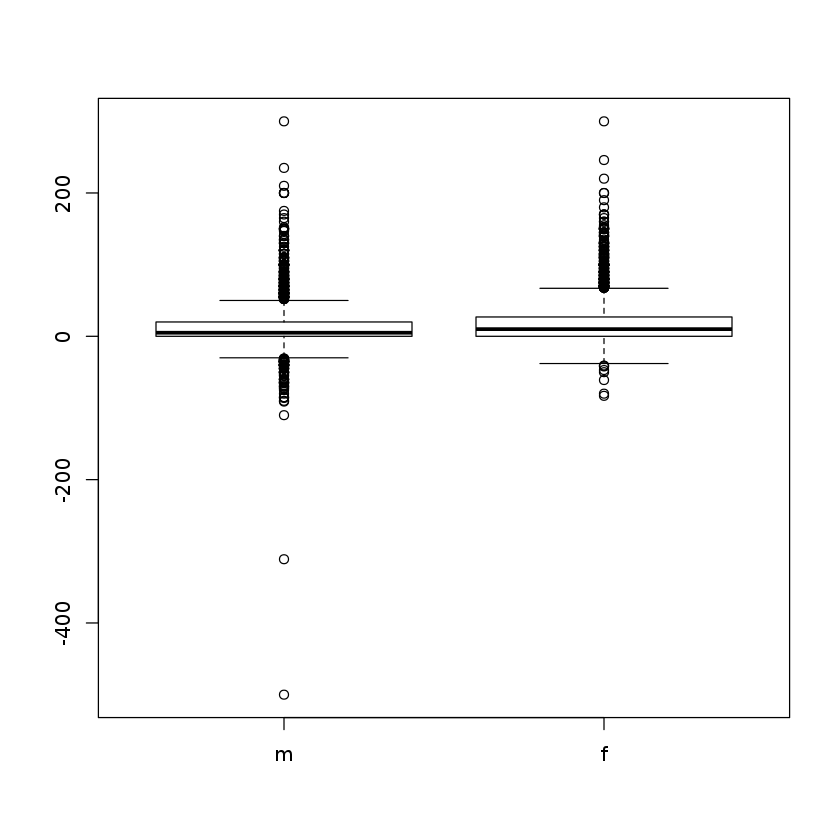

In [17]:
boxplot(wdiff~cdc$gender)

To make it easier to see what the difference are between these groups I am going to make another data set.  This time I am using the `outline=FASLE` which omits the outliers. 

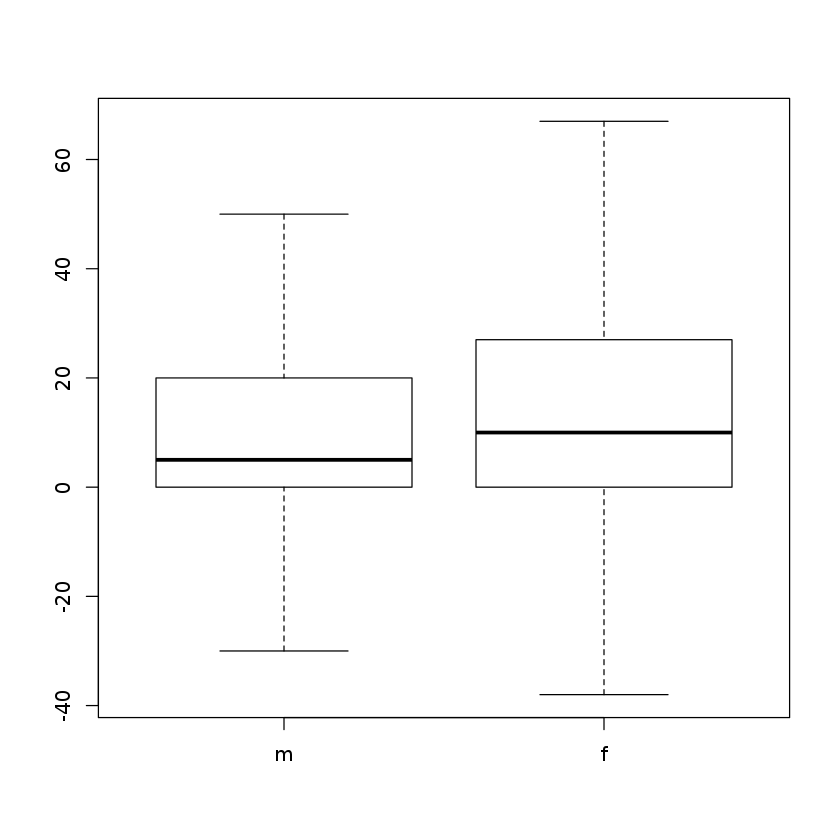

In [18]:
boxplot(wdiff~cdc$gender,outline=FALSE)

We can see the median for women is slightly higher, and that the spread for women is also higher.  So there is more variation within the desired change in weight for women, and a typical woman would like to lose more weight than a typical man.  However the actual differences are fairly small, a 5 pound desired loss for men compared to 10 pounds for women.

6) Now it’s time to get creative. Find the mean and standard deviation of weight and determine what proportion of the weights are within one standard deviation of the mean.

**My first steps are to compute the mean and the standard deviation of the weight variable.**

In [19]:
sd(cdc$weight)

[1] 40.08097

In [20]:
mean(cdc$weight)

[1] 169.683

**I am now going to find out how many weights are between 130 and 210, within 1 standard deviation of the mean.  There are two solutions to this problem.  First I will compute the exact value, second I will approximate the value using a histogram.**

---

I first subset my data, selecting only the row which have  a weight within the desired range.  I am calling this data `within_one`.

In [21]:
within_one<-subset(cdc,cdc$weight>129.60&cdc$weight<209.76)

I now need to find out how many rows there are in my new data set.  I will use the `dim` command to compute the dimmension of the data table.

In [22]:
dim(within_one)

[1] 14152     9

In [23]:
14152/20000

[1] 0.7076

We can see from the dimensions that there are 14 152 people with weights withing 1 standard deviation of the mean.  That means that 70.76% of the data points are within that range.

---

Another approach is to estimate the number of people with weights between 130 and 210 by using a histogram.  I have chosen the breaks for the histogram below so that I can start counting at 130 and end at 210.

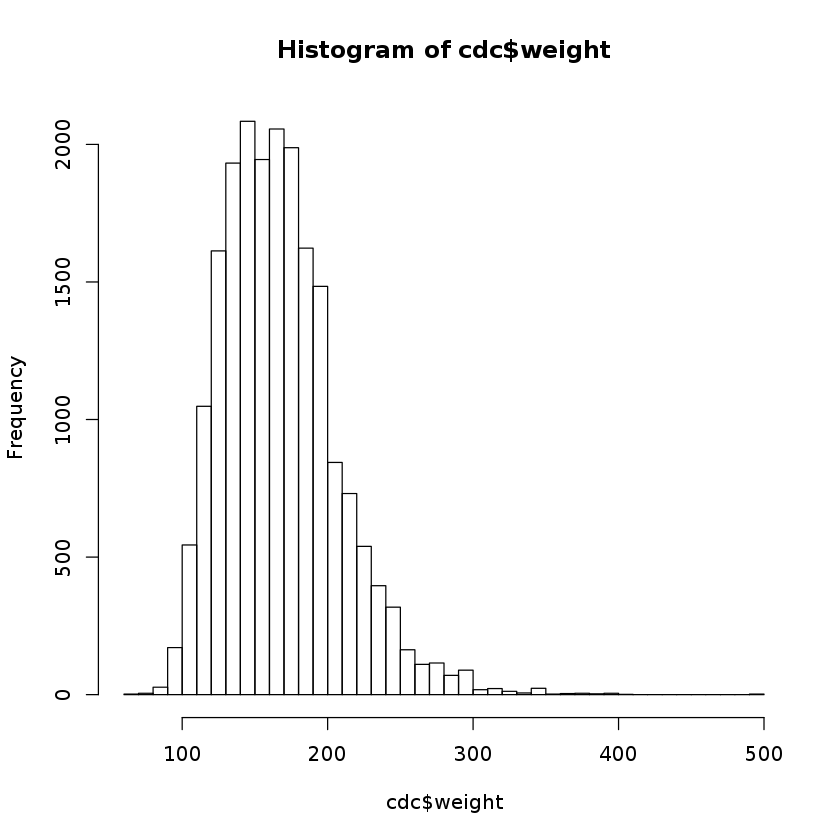

In [24]:
hist(cdc$weight,breaks=40)

I can estimate how many entries there are in the columns between 130 and 210.

Or, I can add some more options to the histogram command so it will include the information that I want.


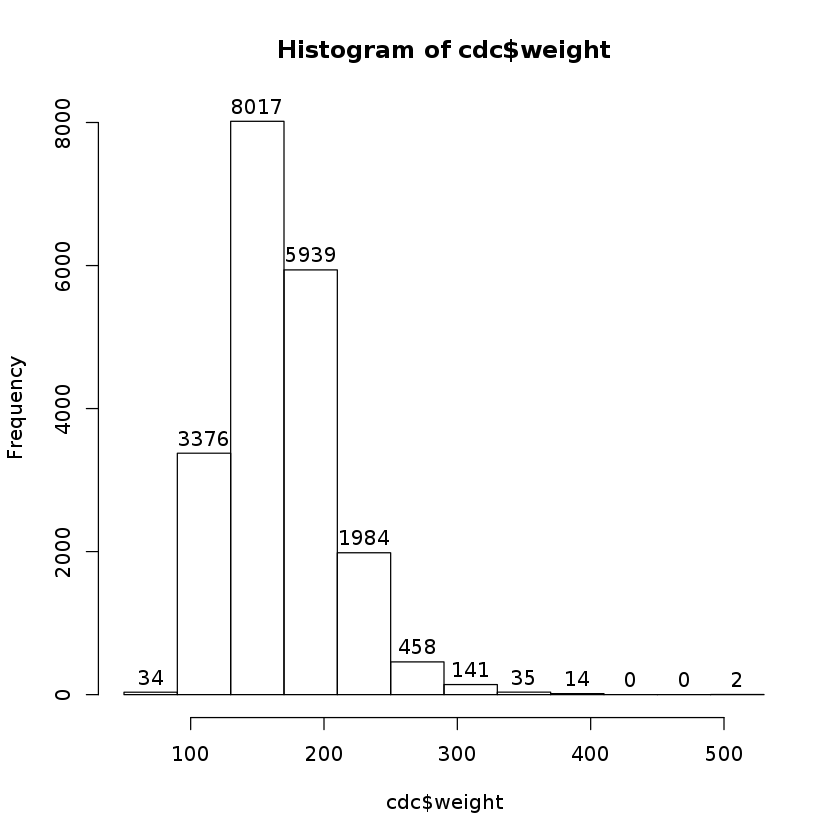

In [25]:
hist(cdc$weight,breaks=c(50,90,130,170,210,250,290,330,370,410,450,490,530),labels=TRUE)

I have manually set the intervals in the histogram to be of with 40, and to include 170 as one of the break points.  This means that there is one bar with all of the data points between 130 and 170, and another from 170 to 210.  I also used the plot option `labels=TRUE` which prints a count for each of the bars.  I can use this to compute how many data points are in the desired range.

In [26]:
8017+5939

[1] 13956

I do get a different answer from the first method, since I rounded the mean and standard deviation, so the ranges I am using are slightly different than the exact value.

In [27]:
13956/20000

[1] 0.6978